# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [3]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_DBLegends_1.csv")
df.head()

,userName,score,at,content
0,Lmao Pisan kang,1,2024-06-22 00:25:57,Game p2w tai
1,Muhammad Bintang Rizky Febrian,1,2024-06-21 22:18:34,Your search for opponents in pvp is really unf...
2,fariel Muh2023,5,2024-06-21 14:41:12,Sistem gachanya yg sangat akurat ketimbang gam...
3,Alfian Naban,4,2024-06-21 12:18:52,Mendapatkan Chrono Crystal di permudah dong de...
4,Wahdan hasbul Wafi,4,2024-06-21 10:26:41,Apa apa loading game binatang


In [4]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Game p2w tai,Lmao Pisan kang,2024-06-22 00:25:57
1,Your search for opponents in pvp is really unf...,Muhammad Bintang Rizky Febrian,2024-06-21 22:18:34
2,Sistem gachanya yg sangat akurat ketimbang gam...,fariel Muh2023,2024-06-21 14:41:12
3,Mendapatkan Chrono Crystal di permudah dong de...,Alfian Naban,2024-06-21 12:18:52
4,Apa apa loading game binatang,Wahdan hasbul Wafi,2024-06-21 10:26:41
...,...,...,...
1495,Lagi loading gacha tiba-tiba keluar terus CC s...,Fajar Sidik,2023-11-28 20:30:59
1496,Game apa ini main kagak kebanyakan habis round...,Akunnew New,2023-11-28 19:32:43
1497,This game only for the pay 2 win player not f2...,joshua charlie,2023-11-28 17:13:57
1498,This game is cool and all but i want a new way...,Gerrardy Safaraz,2023-11-28 15:11:36


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1500 non-null   object
 1   userName  1500 non-null   object
 2   at        1500 non-null   object
dtypes: object(3)
memory usage: 35.3+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,1500,1500,1500
unique,1384,1495,1500
top,Good game,Dani Kurniawan,2024-06-22 00:25:57
freq,17,2,1


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1500, 3)

In [8]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong

df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1384, 3)

In [13]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,game pw tai,Lmao Pisan kang,2024-06-22 00:25:57
1,your search for opponents in pvp is really unf...,Muhammad Bintang Rizky Febrian,2024-06-21 22:18:34
2,sistem gachanya yg sangat akurat ketimbang gam...,fariel Muh2023,2024-06-21 14:41:12
3,mendapatkan chrono crystal di permudah dong de...,Alfian Naban,2024-06-21 12:18:52
4,apa apa loading game binatang,Wahdan hasbul Wafi,2024-06-21 10:26:41
...,...,...,...
1495,lagi loading gacha tibatiba keluar terus cc sa...,Fajar Sidik,2023-11-28 20:30:59
1496,game apa ini main kagak kebanyakan habis round...,Akunnew New,2023-11-28 19:32:43
1497,this game only for the pay win player not fp ...,joshua charlie,2023-11-28 17:13:57
1498,this game is cool and all but i want a new way...,Gerrardy Safaraz,2023-11-28 15:11:36


# **Normalization**

In [16]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,game paswword tai,Lmao Pisan kang,2024-06-22 00:25:57
1,your search for opponents in pvp is really unf...,Muhammad Bintang Rizky Febrian,2024-06-21 22:18:34
2,sistem gachanya yang sangat akurat ketimbang g...,fariel Muh2023,2024-06-21 14:41:12
3,mendapatkan chrono crystal di permudah dong de...,Alfian Naban,2024-06-21 12:18:52
4,apa apa loading game binatang,Wahdan hasbul Wafi,2024-06-21 10:26:41
...,...,...,...
1495,lagi loading gacha tibatiba keluar terus cc sa...,Fajar Sidik,2023-11-28 20:30:59
1496,game apa ini main katidak kebanyakan habis rou...,Akunnew New,2023-11-28 19:32:43
1497,this game only for the pay win player not fp ...,joshua charlie,2023-11-28 17:13:57
1498,this game is cool and all but i want a new way...,Gerrardy Safaraz,2023-11-28 15:11:36


# **Stopwords**

In [17]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


In [18]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,game paswword tai,Lmao Pisan kang,2024-06-22 00:25:57
1,your search for opponents in pvp is really unf...,Muhammad Bintang Rizky Febrian,2024-06-21 22:18:34
2,sistem gachanya sangat akurat ketimbang game d...,fariel Muh2023,2024-06-21 14:41:12
3,mendapatkan chrono crystal permudah dong devel...,Alfian Naban,2024-06-21 12:18:52
4,apa apa loading game binatang,Wahdan hasbul Wafi,2024-06-21 10:26:41
...,...,...,...
1495,loading gacha tibatiba keluar terus cc hanguss...,Fajar Sidik,2023-11-28 20:30:59
1496,game apa main katidak kebanyakan habis round s...,Akunnew New,2023-11-28 19:32:43
1497,this game only for the pay win player not fp ...,joshua charlie,2023-11-28 17:13:57
1498,this game is cool and all but i want a new way...,Gerrardy Safaraz,2023-11-28 15:11:36


# **Tokenize**

In [19]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                   [game, paswword, tai]
1       [your, search, for, opponents, in, pvp, is, re...
2       [sistem, gachanya, sangat, akurat, ketimbang, ...
3       [mendapatkan, chrono, crystal, permudah, dong,...
4                     [apa, apa, loading, game, binatang]
                              ...                        
1495    [loading, gacha, tibatiba, keluar, terus, cc, ...
1496    [game, apa, main, katidak, kebanyakan, habis, ...
1497    [this, game, only, for, the, pay, win, player,...
1498    [this, game, is, cool, and, all, but, i, want,...
1499    [ampas, mulu, gachanya, udh, susah, dapet, lfn...
Name: content, Length: 1384, dtype: object

# **Stemming**

In [20]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DBLegends_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DBLegends_1.csv', encoding = 'latin1')
df_clean

,content
0,game paswword tai
1,your search for opponents in pvp is really unf...
2,sistem gachanya sangat akurat ketimbang game d...
3,dapat chrono crystal mudah dong developer
4,apa apa loading game binatang
...,...
1379,loading gacha tibatiba keluar terus cc hanguss...
1380,game apa main katidak banyak habis round seles...
1381,this game only for the pay win player not fp f...
1382,this game is cool and all but i want a new way...


# **Translate**

In [22]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [23]:
# import pandas as pd
# from easynmt import EasyNMT

In [24]:
# # Load Data Hasil Stemming

# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DBLegends_1.csv', encoding='latin1')

In [25]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [26]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [27]:
# # Imputing NaN Values

# df2 = df_clean.fillna(method = 'pad')
# df2

In [28]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_DBLegends_1.csv')

In [29]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_DBLegends_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game paswword tai,Shit pastword game
1,1,your search for opponents in pvp is really unf...,your search for options in pvp is really unfai...
2,2,sistem gachanya sangat akurat ketimbang game d...,The gacha system is more accurate than games a...
3,3,dapat chrono crystal mudah dong developer,I got Chrono Crystal. Easy with the developer.
4,4,apa apa loading game binatang,What's the loading game animal?
...,...,...,...
1379,1379,loading gacha tibatiba keluar terus cc hanguss...,Loading gacha came out of nowhere and cc's bur...
1380,1380,game apa main katidak banyak habis round seles...,What game do you play when you don't run out m...
1381,1381,this game only for the pay win player not fp f...,this game only for the pay win player not fp f...
1382,1382,this game is cool and all but i want a new way...,this game is cool and all but i want a new way...


# **Labeling**

In [30]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_DBLegends_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game paswword tai,Shit pastword game
1,1,your search for opponents in pvp is really unf...,your search for options in pvp is really unfai...
2,2,sistem gachanya sangat akurat ketimbang game d...,The gacha system is more accurate than games a...
3,3,dapat chrono crystal mudah dong developer,I got Chrono Crystal. Easy with the developer.
4,4,apa apa loading game binatang,What's the loading game animal?
...,...,...,...
1379,1379,loading gacha tibatiba keluar terus cc hanguss...,Loading gacha came out of nowhere and cc's bur...
1380,1380,game apa main katidak banyak habis round seles...,What game do you play when you don't run out m...
1381,1381,this game only for the pay win player not fp f...,this game only for the pay win player not fp f...
1382,1382,this game is cool and all but i want a new way...,this game is cool and all but i want a new way...


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 629
Netral = 404
Negatif = 351

Total Data Seluruhnya : 1384


In [34]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,game paswword tai,Shit pastword game,Negatif
1,1,your search for opponents in pvp is really unf...,your search for options in pvp is really unfai...,Netral
2,2,sistem gachanya sangat akurat ketimbang game d...,The gacha system is more accurate than games a...,Positif
3,3,dapat chrono crystal mudah dong developer,I got Chrono Crystal. Easy with the developer.,Positif
4,4,apa apa loading game binatang,What's the loading game animal?,Negatif
...,...,...,...,...
1379,1379,loading gacha tibatiba keluar terus cc hanguss...,Loading gacha came out of nowhere and cc's bur...,Negatif
1380,1380,game apa main katidak banyak habis round seles...,What game do you play when you don't run out m...,Negatif
1381,1381,this game only for the pay win player not fp f...,this game only for the pay win player not fp f...,Positif
1382,1382,this game is cool and all but i want a new way...,this game is cool and all but i want a new way...,Positif


In [35]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,game paswword tai,Shit pastword game,Negatif
1,your search for opponents in pvp is really unf...,your search for options in pvp is really unfai...,Netral
2,sistem gachanya sangat akurat ketimbang game d...,The gacha system is more accurate than games a...,Positif
3,dapat chrono crystal mudah dong developer,I got Chrono Crystal. Easy with the developer.,Positif
4,apa apa loading game binatang,What's the loading game animal?,Negatif
...,...,...,...
1379,loading gacha tibatiba keluar terus cc hanguss...,Loading gacha came out of nowhere and cc's bur...,Negatif
1380,game apa main katidak banyak habis round seles...,What game do you play when you don't run out m...,Negatif
1381,this game only for the pay win player not fp f...,this game only for the pay win player not fp f...,Positif
1382,this game is cool and all but i want a new way...,this game is cool and all but i want a new way...,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



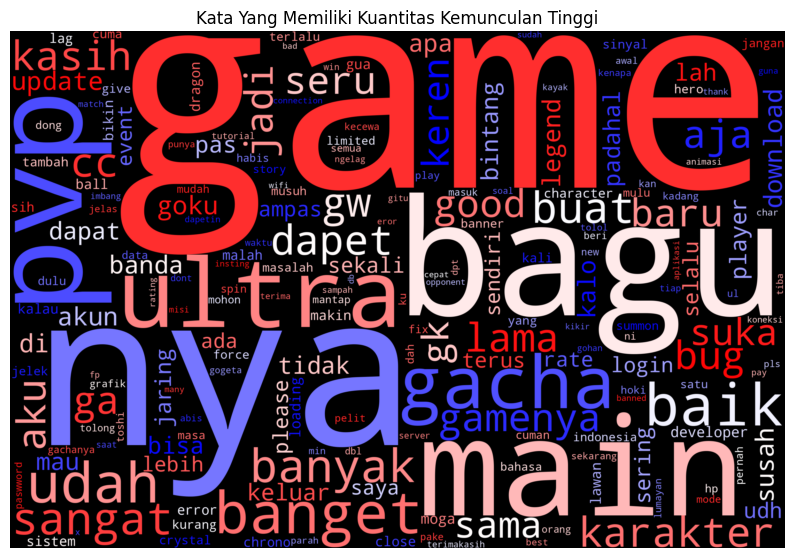

In [36]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


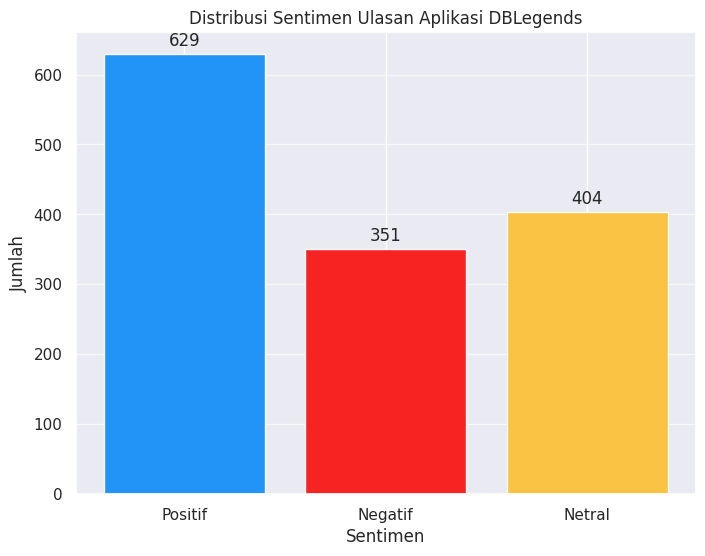

In [59]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DBLegends")


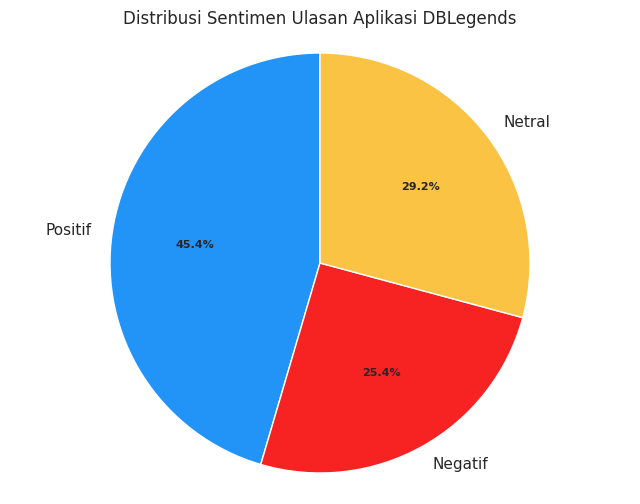

In [60]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DBLegends")

In [39]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,game paswword tai,Shit pastword game,Negatif
2,sistem gachanya sangat akurat ketimbang game d...,The gacha system is more accurate than games a...,Positif
3,dapat chrono crystal mudah dong developer,I got Chrono Crystal. Easy with the developer.,Positif
4,apa apa loading game binatang,What's the loading game animal?,Negatif
5,why tos,why high five,Positif
...,...,...,...
1375,game nya bagus biasa kalau main pvp ngenag,It's a great game to play pvp of fun.,Positif
1379,loading gacha tibatiba keluar terus cc hanguss...,Loading gacha came out of nowhere and cc's bur...,Negatif
1380,game apa main katidak banyak habis round seles...,What game do you play when you don't run out m...,Negatif
1381,this game only for the pay win player not fp f...,this game only for the pay win player not fp f...,Positif


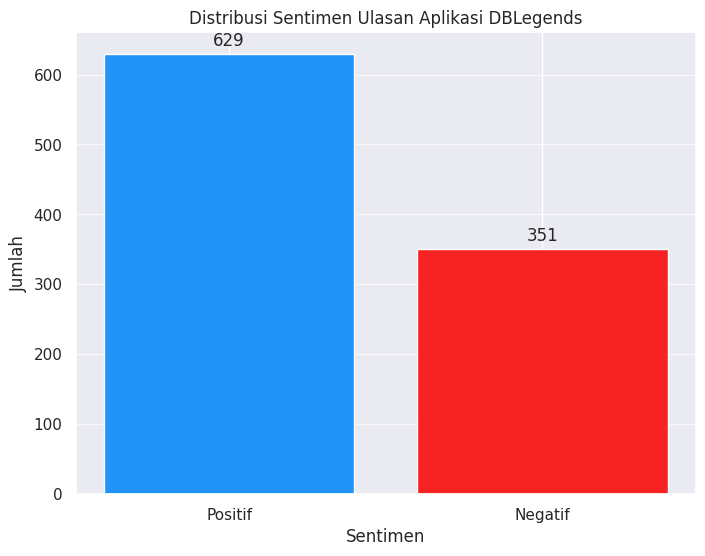

In [61]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DBLegends")


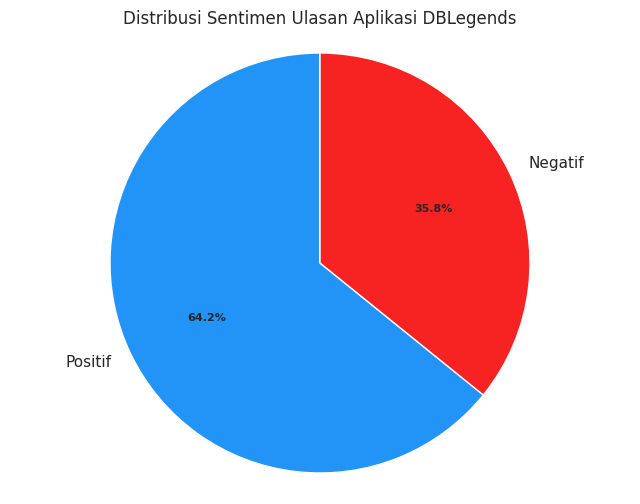

In [62]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DBLegends")

In [42]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,game paswword tai,Shit pastword game,1
2,sistem gachanya sangat akurat ketimbang game d...,The gacha system is more accurate than games a...,0
3,dapat chrono crystal mudah dong developer,I got Chrono Crystal. Easy with the developer.,0
4,apa apa loading game binatang,What's the loading game animal?,1
5,why tos,why high five,0
...,...,...,...
1375,game nya bagus biasa kalau main pvp ngenag,It's a great game to play pvp of fun.,0
1379,loading gacha tibatiba keluar terus cc hanguss...,Loading gacha came out of nowhere and cc's bur...,1
1380,game apa main katidak banyak habis round seles...,What game do you play when you don't run out m...,1
1381,this game only for the pay win player not fp f...,this game only for the pay win player not fp f...,0


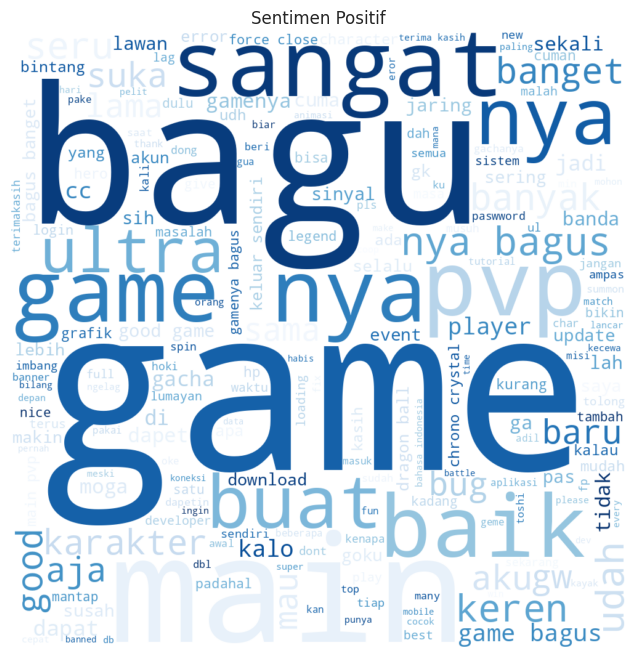

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

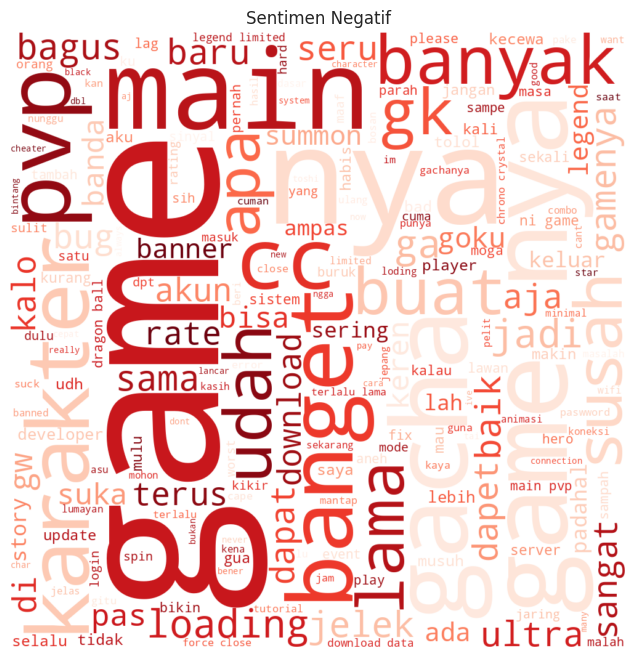

In [44]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

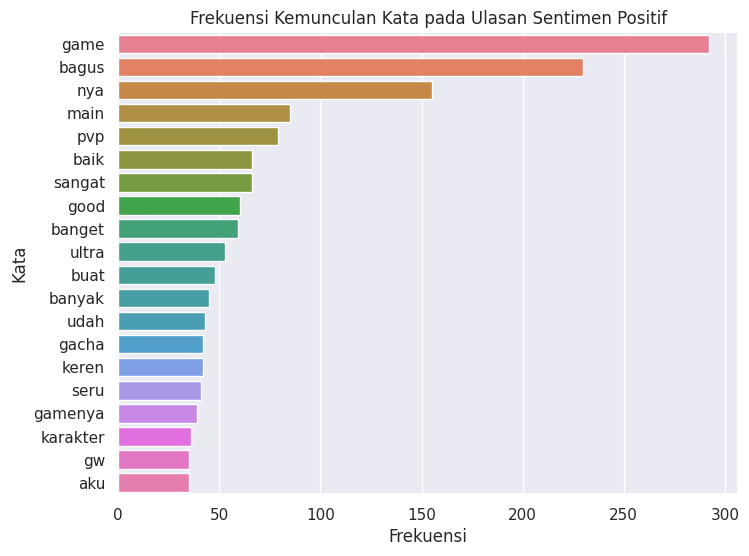

In [51]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data[data['sentimen'] == 0]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 20
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [53]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
    game        292
   bagus        230
     nya        155
    main         85
     pvp         79
    baik         66
  sangat         66
    good         60
  banget         59
   ultra         53
    buat         48
  banyak         45
    udah         43
   gacha         42
   keren         42
    seru         41
 gamenya         39
karakter         36
      gw         35
     aku         35


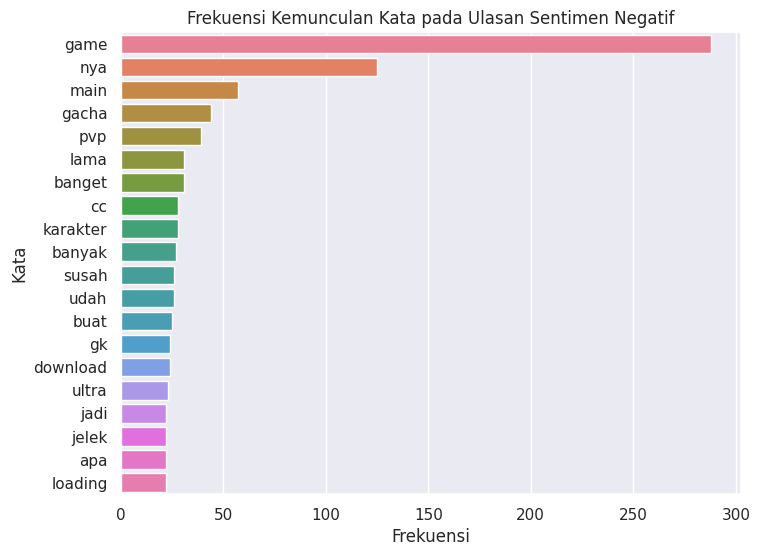

In [49]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data[data['sentimen'] == 1]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 20
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [52]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
    game        288
     nya        125
    main         57
   gacha         44
     pvp         39
    lama         31
  banget         31
      cc         28
karakter         28
  banyak         27
   susah         26
    udah         26
    buat         25
      gk         24
download         24
   ultra         23
    jadi         22
   jelek         22
     apa         22
 loading         22


In [54]:
# Menghitung Jumlah Sentimen Positif & Negatif

data['sentimen'].value_counts()

sentimen
0    629
1    351
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [55]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [56]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [57]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

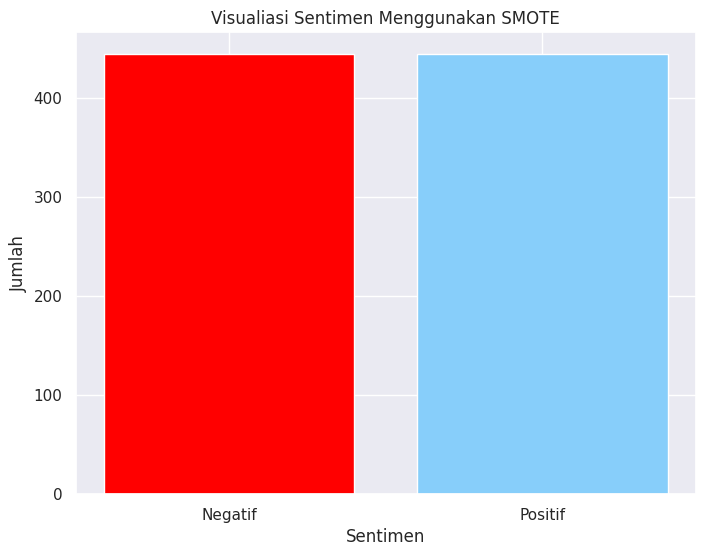

In [58]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [63]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [64]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.7891156462585034
Akurasi untuk c = 0.05: 0.7857142857142857
Akurasi untuk c = 0.25: 0.7755102040816326
Akurasi untuk c = 0.5: 0.7789115646258503
Akurasi untuk c = 0.75: 0.7789115646258503
Akurasi untuk c = 1: 0.7789115646258503


In [66]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [67]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7789115646258503 


In [68]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.7789

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       185
           1       0.72      0.66      0.69       109

    accuracy                           0.78       294
   macro avg       0.76      0.75      0.76       294
weighted avg       0.78      0.78      0.78       294



In [69]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[157  28]
 [ 37  72]]

True Positives (TP) =  157

True Negatives (TN) =  72

False Positives (FP) =  28

False Negatives (FN) =  37

Accuracy =  0.7789115646258503


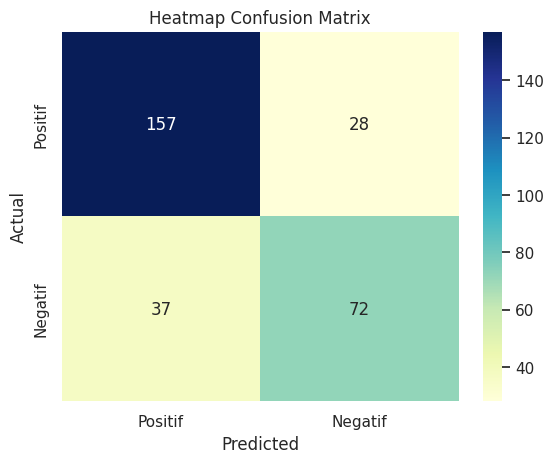

In [70]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [71]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [72]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7789


In [73]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2211


# **Testing**

In [74]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Tolong dong developer game nya kadang suka nge bug pas lagi spin sayang rugi beli chrono banyak²tapi pas ngespin malah stack padahal jaringan kgk lemot sama sekali tolong ya udah rugin3k chorono soalnya terlalu banyak bug juga game nya udah login tiba tiba keluar pas login lagi malah gk bisa masuk gak jelas game rusak game gk jelas di apus di downlaod lagi mau di login make akun google yang udah ada akun db nya malah gk bisa tolol
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 61.03%
Probabilitas: 61.027549932819916 %


In [75]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Game nya bagus, tapi tolong tambahin kartu yang lebih langka lagi, jadi misalnya dapat kartu itu, jadi saya tidak sia sia dan ingin memainkan gamenya lagi, kalo cuma itu itu aja rasanya bosan, tolong ya developer!
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 85.83%
Probabilitas: 85.83289932907672 %
